### Janet Illescas Coria

# Práctica 6

## Representación del color

In [27]:
# Bibliotecas para la manipulación de imágenes, matrices, crear
# números aleatorios y el manejo de archivos y directorios.
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
from collections import Counter
import os

In [5]:
# Obtiene la imagen de la dirección recibida.
def obtener_img(img):
    try: 
        # Verificamos si el archivo existe en la dirección recibida, si 
        # no existe lanzamos una excepción.
        if not os.path.exists(img):
            raise TypeError('No existe el archivo')
            
        # Terminaciones permitidas
        terminaciones = ['.png', '.jpg', '.tif', '.tiff', '.bmp']
        
        # Verificamos si el archivo es png, jpg, tif, tiff o bmp
        for term in terminaciones:
            if img.endswith(term):
                
                # Leemos la imagen.
                img = plt.imread(img)
                
                # Convertimos la imagen a escala de grises (un solo canal)
                #img_gray = np.mean(img, axis=-1)

                # Regresamos la imagen como un arreglo numpy (matriz).
                return img
            
        # Al no ser un archivo permitido lanzamos una excepción.
        raise TypeError('El archivo debe ser png, jpg, tif o tiff')
    
    except TypeError as e:
        print(f"TypeError: {e}")

#### 1. Realiza el realce de la imagen flowers2 de la siguiente manera. Convierte la imagen de RGB a modelo HSI. Toma la banda I, ecualizala y regresa al modelo RGB. 

In [6]:
def rgb_hsi(img):
    
    # Normalizalización
    img = img / 255.0
    
    # Obtenemos los 3 canales
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    
    # Tono (hue)
    num = (0.5 * ((r - g) + (r - b))) 
    den = np.sqrt((r - g)**2 + (r - b) * (g - b))
    ep = np.finfo(float).eps
    theta = np.arccos(num / (den + ep))
    h = theta.copy()
    h = np.degrees(h)
    h[b > g] = 360 - h[b > g]
    h = h / 360
    
        
    # Saturación
    minimo = np.min(img, axis = -1)
    #den = r + g + b 
    s = (1 - (3 * minimo / (r + g + b + ep)))
    
    # Intensidad
    i = (r + g + b) / 3
    
    img_hsi = np.stack([i, s, h], axis=-1)
    img_hsi = np.clip(img_hsi, 0, 1)
    
    return img_hsi
        

In [23]:
def ecualizacion_i(img):
    
    img_i = np.uint8(img[:, :, 0] * 255)
    
    hist = np.bincount(img_i.flatten(), minlength=256)
    cdf = np.cumsum(hist) / np.sum(hist)
    img_ec = np.floor(255 * cdf[img_i]).astype(np.uint8)
                     
    img[:, :, 0] = img_ec / 255

    return img 

In [25]:
def hsi_rgb(img):
    i = img_ec[:, :, 0]
    s = img_ec[:, :, 1]
    h = img_ec[:, :, 2] * 360

    r = np.zeros(h.shape)
    g = np.zeros(h.shape)
    b = np.zeros(h.shape)

    for y in range(len(img)):
        for x in range(len(img[0])):
            H = h[y][x]

            if 0 <= H < 120:
                rH = math.radians(H)
                b[y][x] = i[y][x] * (1 - s[y][x])
                r[y][x] = i[y][x] * (1 + ((s[y][x] * math.cos(rH)) / math.cos(math.radians(60) - rH)))
                g[y][x] = (3 * i[y][x]) - (r[y][x] + b[y][x])

            elif 120 <= H < 240:
                H -= 120
                rH = math.radians(H)
                r[y][x] = i[y][x] * (1 - s[y][x])
                g[y][x] = i[y][x] * (1 + ((s[y][x] * math.cos(rH)) / math.cos(math.radians(60) - rH)))
                b[y][x] = (3 * i[y][x]) - (r[y][x] + g[y][x])

            else:
                H -= 240
                rH = math.radians(H)
                g[y][x] = i[y][x] * (1 - s[y][x])
                b[y][x] = i[y][x] * (1 + ((s[y][x] * math.cos(rH)) / math.cos(math.radians(60) - rH)))
                r[y][x] = (3 * i[y][x]) - (g[y][x] + b[y][x])

    img_rgb = np.stack([r, g, b], axis=-1)
    img_rgb = np.clip(img_rgb, 0, 1)
    return img_rgb

Text(0.5, 1.0, 'Imagen RGB')

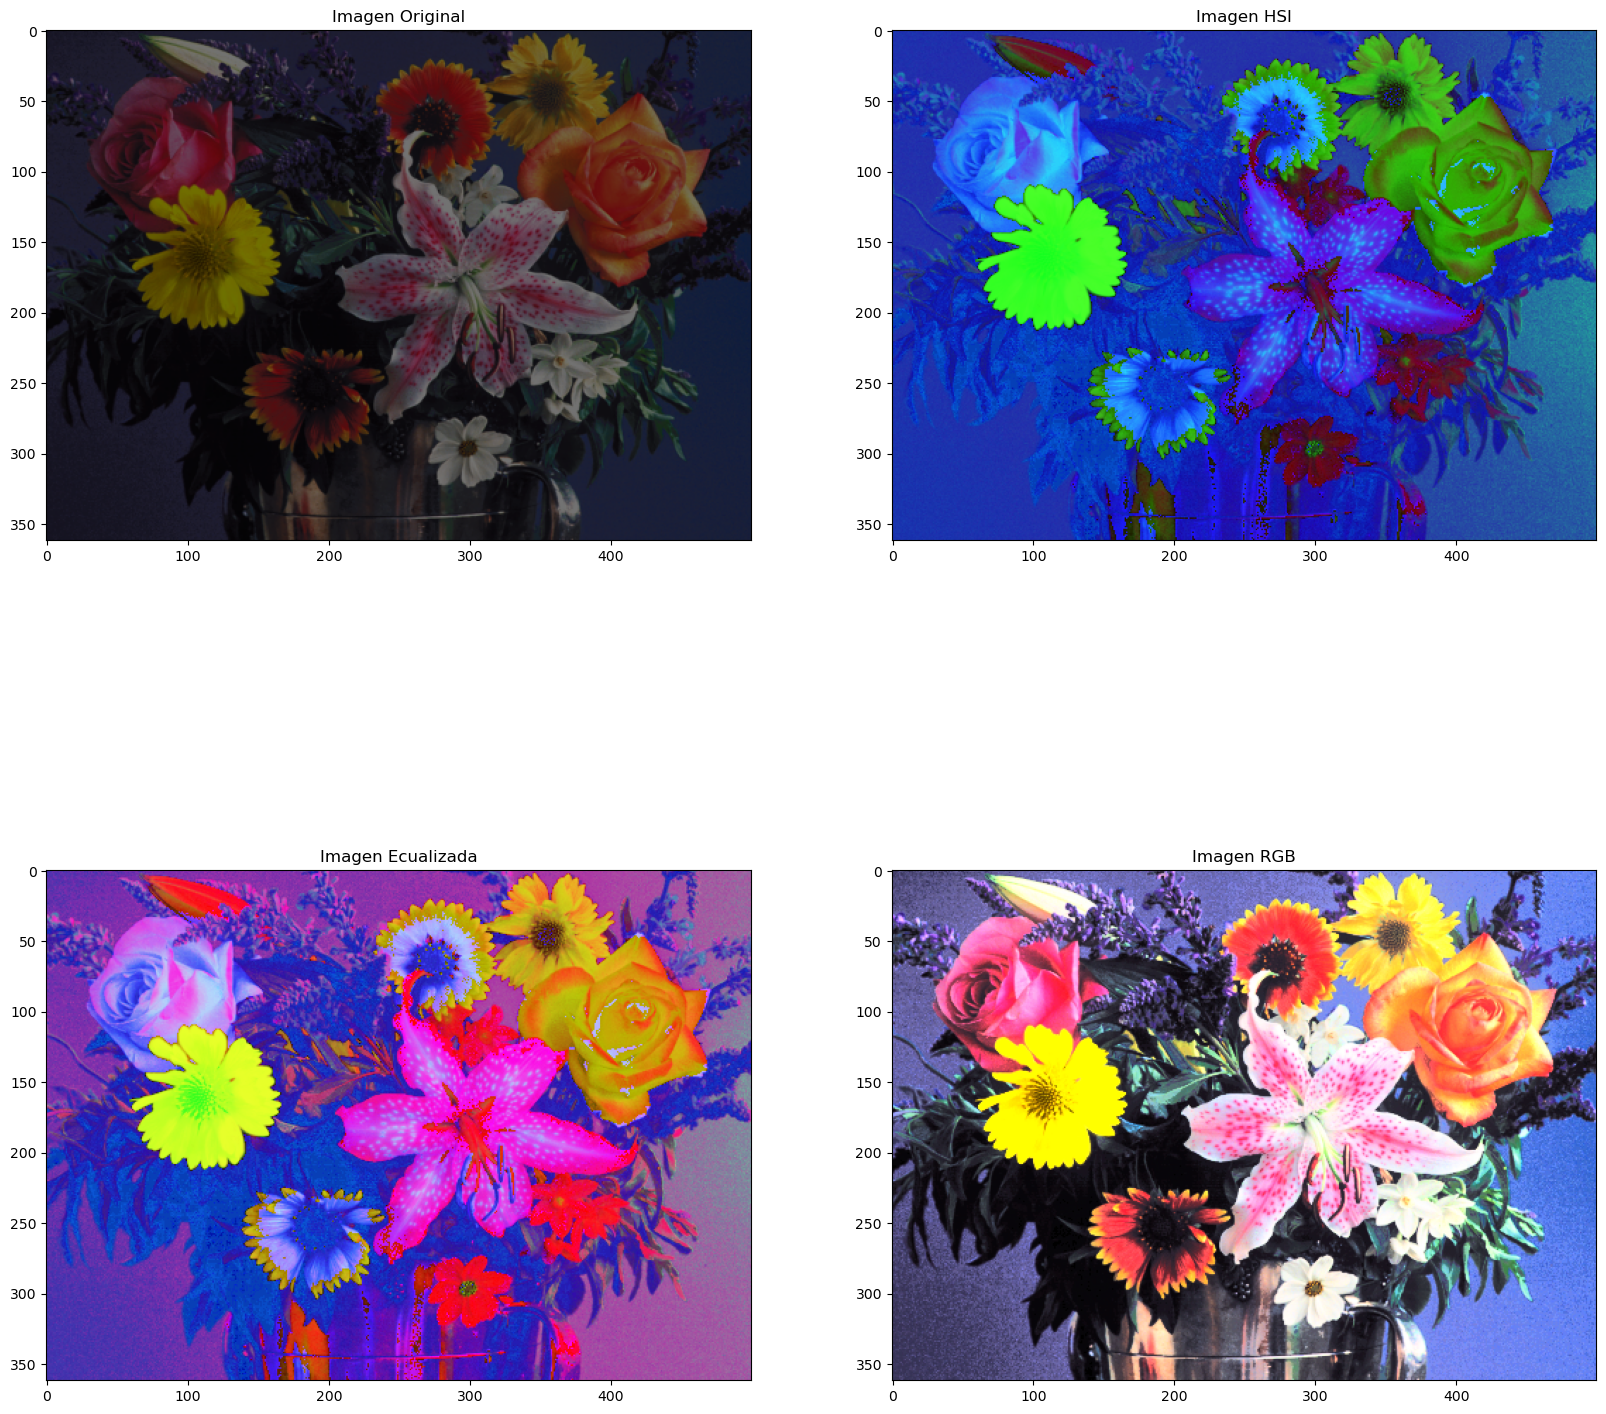

In [26]:
img = obtener_img('Imagenes/flowers2.bmp')

img_hsi = rgb_hsi(img)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(img_hsi)
plt.title('Imagen HSI')


img_ec = ecualizacion_i(img_hsi)

plt.subplot(2, 2, 3)
plt.imshow(img_ec)
plt.title('Imagen Ecualizada')


img_rgb = hsi_rgb(img_ec)

plt.subplot(2, 2, 4)
plt.imshow(img_rgb)
plt.title('Imagen RGB')


#### 2. Toma las imágenes propuestas que están en escala de grises. Representa cada una de ellas en pseudocolor utilizando el método de rebanado de intensidad. Haz que tu función pueda recibir como parametro la imagen y el número de niveles de color a representar. 

In [167]:
def colores(n):
    colors =  np.zeros((n, 3), dtype=np.uint8)
    
    for i in range(n):
        r = np.random.randint(0, 256)
        g = np.random.randint(0, 256)
        b = 100

        colors[i] = [r, g, b]
        
    return colors

In [166]:
def pseudocolor(img, n):
    if len(img.shape) == 3:
        img = rgb2gray(img)
    y = img.shape[0]
    x = img.shape[1]
        
    # Normalización
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
        
    img_pc = np.zeros((y, x, 3), dtype=np.uint8)
    colors = colores(n)
    
    # Bins
    ind = np.digitize(img, np.linspace(0, 1, n)) - 1
    img_pc = colors[ind]

    return img_pc
    

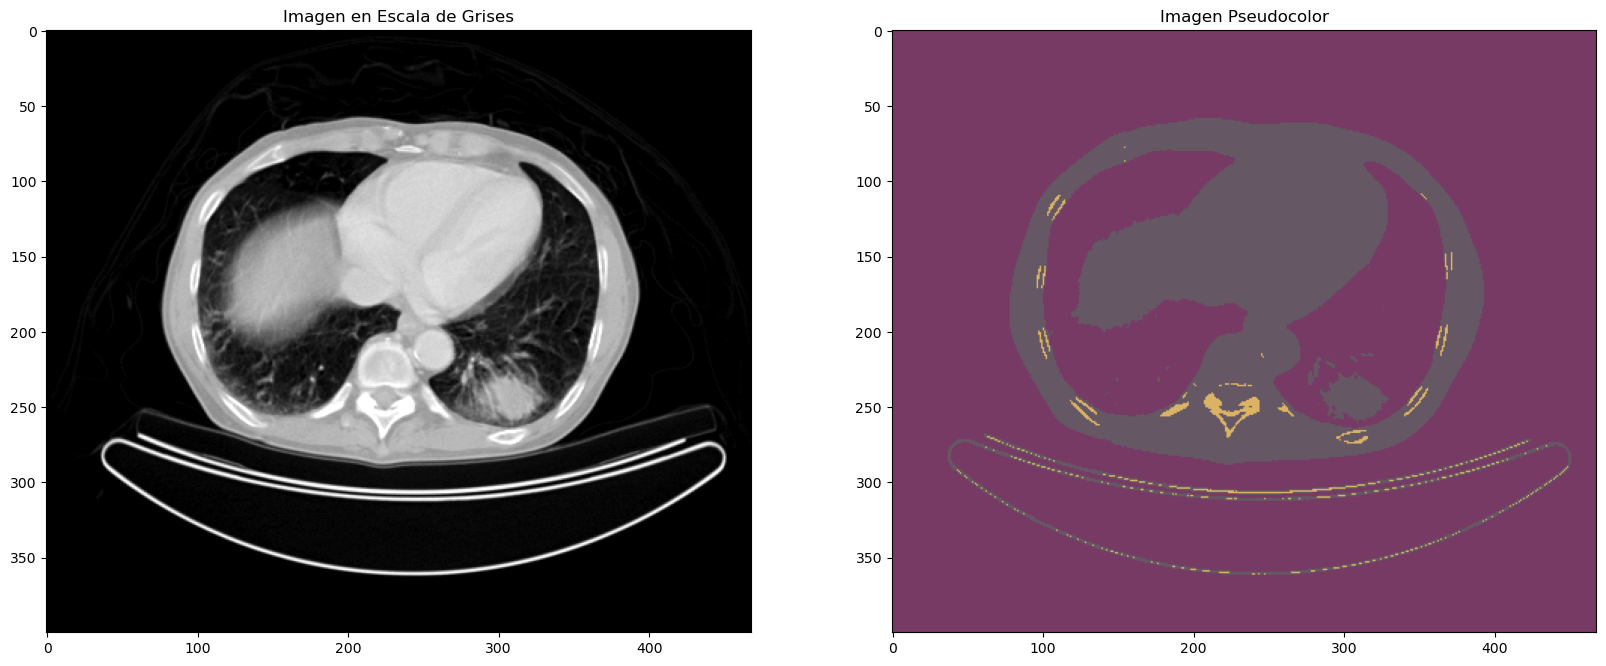

In [203]:

img = plt.imread("Imagene.png")
img_pc = pseudocolor(img, 3)


plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img, ='gray')
plt.imshow(img, ='gray')
plt.title('Imagen en Escala de Grises')

plt.subplot(1, 2, 2)
plt.imshow(img_pc)
plt.title('Imagen Pseudocolor')

plt.show(

In [ ]:
caderacadera_1_1

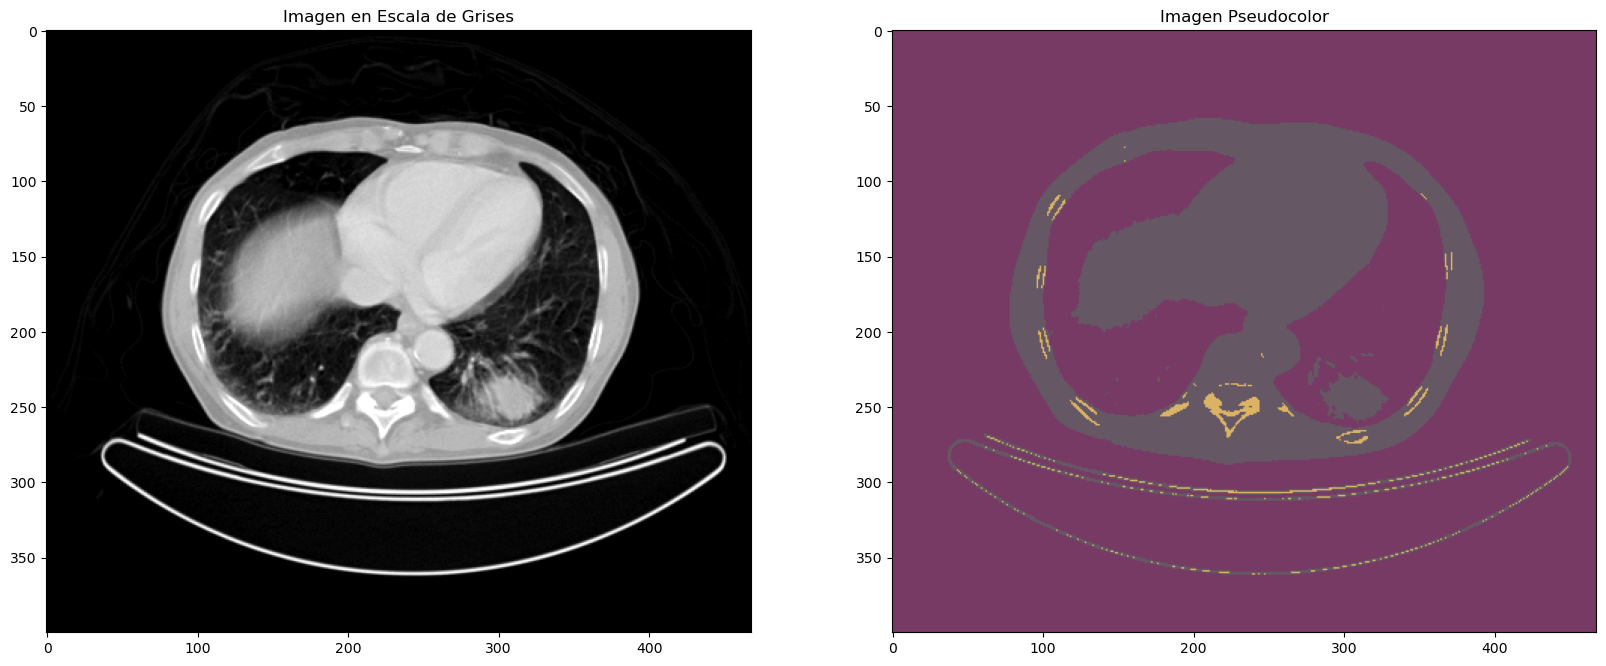

In [203]:

img = plt.imread("Imagenes/medtest.png")
img_pc = pseudocolor(img, 3)


plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img, ='gray')
plt.imshow(img, ='gray')
plt.title('Imagen en Escala de Grises')

plt.subplot(1, 2, 2)
plt.imshow(img_pc)
plt.title('Imagen Pseudocolor')

plt.show(